<a href="https://colab.research.google.com/github/Yusufbek571/Toshkent_uylar_narxi_tahmini/blob/main/Toshkent_uylar_narxi_tahmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


## Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [ ]:
#Kerakli kutubhonalar chaqirildi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df.shape # Data o'lchami aniqlandi


(7565, 7)

In [ ]:
df=df.drop(columns="location")
price_o=df.loc[df["price"]=='Договорная'].index
size_o=df.loc[df["size"]=='Площадьземли:1сот'].index
df=df.drop(index=size_o)#Noto'gri malumotlar o'chirildi
df=df.drop(index=price_o)#Noto'gri malumotlar o'chirildi

In [ ]:
  df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7465 entries, 0 to 7564
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   district    7465 non-null   object
 1   rooms       7465 non-null   int64 
 2   size        7465 non-null   object
 3   level       7465 non-null   int64 
 4   max_levels  7465 non-null   int64 
 5   price       7465 non-null   object
dtypes: int64(3), object(3)
memory usage: 408.2+ KB


In [ ]:
df["size"]=df["size"].astype(float)#Malumotlar int farmatiga o'tkazildi
df["size"]=df["size"].astype(int)#Malumotlar int farmatiga o'tkazildi
df["price"]=df["price"].astype(int)#Malumotlar int farmatiga o'tkazildi

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7465 entries, 0 to 7564
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   district    7465 non-null   object
 1   rooms       7465 non-null   int64 
 2   size        7465 non-null   int64 
 3   level       7465 non-null   int64 
 4   max_levels  7465 non-null   int64 
 5   price       7465 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 408.2+ KB


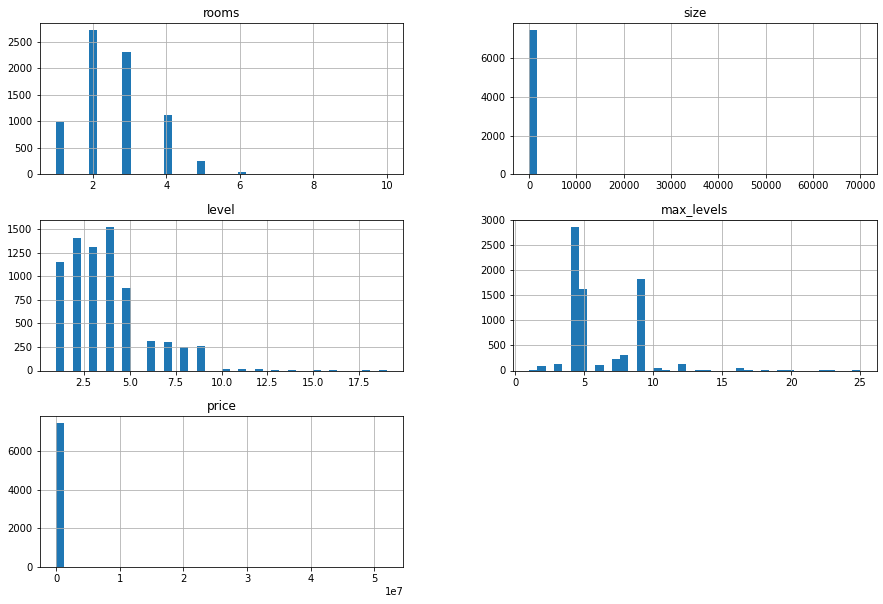

In [ ]:
%matplotlib inline
df.hist(figsize=(15,10),bins=40)
plt.show()

In [ ]:
df.describe().T #Malumotlarning statistik jadvali

,count,mean,std,min,25%,50%,75%,max
rooms,7465.0,2.622103,1.083155,1.0,2.0,3.0,3.0,10.0
size,7465.0,113.524180,1501.158399,1.0,50.0,65.0,85.0,70000.0
level,7465.0,3.693771,2.236905,1.0,2.0,3.0,5.0,19.0
max_levels,7465.0,6.023979,2.607103,1.0,4.0,5.0,9.0,25.0
price,7465.0,71323.672472,640565.942591,2.0,35000.0,46500.0,67000.0,52000000.0


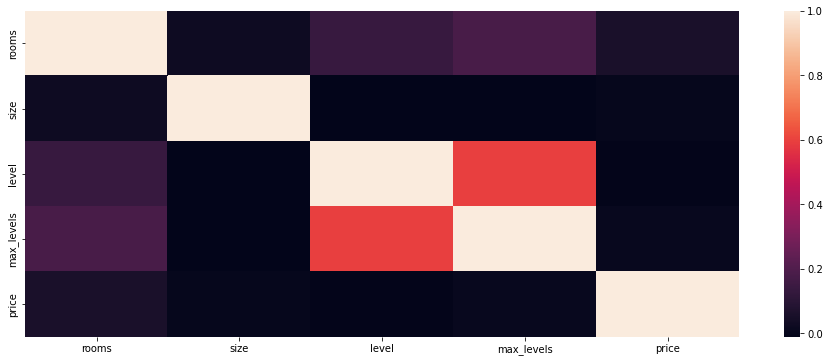

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(data=df.corr(),)
plt.show()


In [ ]:
df.corrwith(df["price"])

rooms         0.056161
size          0.001107
level        -0.003449
max_levels    0.011175
price         1.000000
dtype: float64

In [ ]:
df.corrwith(df["price"])
df["rooms_per_size"]=df["rooms"]/df["size"]
sonlar=list(range(1,7466))
df

,district,rooms,size,level,max_levels,price,rooms_per_size
0,Юнусабадский,3,57,4,4,52000,0.052632
1,Яккасарайский,2,52,4,5,56000,0.038462
2,Чиланзарский,2,42,4,4,37000,0.047619
3,Чиланзарский,3,65,1,4,49500,0.046154
4,Чиланзарский,3,70,3,5,55000,0.042857
...,...,...,...,...,...,...,...
7560,Яшнободский,1,38,5,5,24500,0.026316
7561,Яшнободский,2,49,1,4,32000,0.040816
7562,Шайхантахурский,2,64,3,9,40000,0.031250
7563,Мирзо-Улугбекский,1,18,1,4,11000,0.055556


In [ ]:
# Malumotlarni ikkiga acratib olamiz(Train,test)
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

X_train = train_set.drop("price", axis=1)
y = train_set["price"].copy()

X_num = X_train.drop("district", axis=1)

In [ ]:
#Malumotlarni standartlashtiraniz
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipeline = Pipeline([
          ('std_scaler', StandardScaler())             
])

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(X_num)
cat_attribs = ['district']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [ ]:
X_prepared = full_pipeline.fit_transform(X_train)
X_prepared[0:5,:]

array([[-5.74588890e-01, -3.52252865e-02,  1.25244709e-01,
        -7.81144577e-01, -7.38138658e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-1.49528780e+00, -5.65445207e-02, -1.20092799e+00,
        -1.54042117e+00, -7.38138658e-02,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 1.26680894e+00,  8.83446407e-03, -3.16812856e-01,
        -4.01506278e-01, -8.16096297e-02,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.0

In [ ]:
from sklearn.linear_model import LinearRegression
# Linear Regressiyani  chakirib olamiz
LR_model = LinearRegression()
LR_model.fit(X_prepared, y)#madelga malumotlarni beramiz
LinearRegression()
test_data = X_train.sample(5)
test_data

,district,rooms,size,level,max_levels,rooms_per_size
1072,Яшнободский,5,203,8,8,0.024631
4043,Олмазорский,2,74,4,9,0.027027
416,Юнусабадский,2,50,2,4,0.040000
960,Чиланзарский,2,42,2,4,0.047619
6715,Учтепинский,2,52,4,4,0.038462


In [ ]:
test_label = y.loc[test_data.index]
test_label

1072    139999
4043     41000
416      33500
960      39000
6715     35000
Name: price, dtype: int64

In [ ]:
test_data_prepared = full_pipeline.transform(test_data)
test_data_prepared
#Test datamizni kerakli holatga keltiramiz

array([[ 2.18750785e+00,  6.63963963e-02,  1.89347497e+00,
         7.37408618e-01, -1.97970046e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00],
       [-5.74588890e-01, -2.52763106e-02,  1.25244709e-01,
         1.11704692e+00, -1.63781195e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-5.74588890e-01, -4.23316979e-02, -7.58870421e-01,
        -7.81144577e-01,  2.12944536e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.0

In [ ]:
predicted_data = LR_model.predict(test_data_prepared)
predicted_data
#İlk Tahminlarimizni ko'ramiz

array([106015.40818465,  61935.77931168,  47434.23439192,  39715.58732235,
        23634.9296556 ])

In [ ]:
pd.DataFrame({'Prognoz':predicted_data, 'Real baxosi': test_label})

,Prognoz,Real baxosi
1072,106015.408185,139999
4043,61935.779312,41000
416,47434.234392,33500
960,39715.587322,39000
6715,23634.929656,35000


In [ ]:
X_test = test_set.drop('price', axis=1)
X_test

,district,rooms,size,level,max_levels,rooms_per_size
2301,Яшнободский,3,86,4,9,0.034884
6126,Учтепинский,3,70,2,5,0.042857
2149,Яккасарайский,3,90,5,5,0.033333
5594,Чиланзарский,1,36,2,4,0.027778
6566,Учтепинский,4,100,1,4,0.040000
...,...,...,...,...,...,...
6593,Шайхантахурский,3,80,6,9,0.037500
4089,Шайхантахурский,6,500,2,2,0.012000
441,Чиланзарский,1,36,2,5,0.027778
5639,Шайхантахурский,3,70,6,7,0.042857


In [ ]:
y_test = test_set['price'].copy()
y_test

2301    89000
6126    43500
2149    45000
5594    24700
6566    87000
        ...  
6593    48000
4089     1800
441     28500
5639    60000
2538    42000
Name: price, Length: 1493, dtype: int64

In [ ]:
X_test_prepared = full_pipeline.transform(X_test)#X Testni kerakli farmatga o'tkizamiz

In [ ]:
y_predicted = LR_model.predict(X_test_prepared)

In [ ]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_predicted)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)
# Madelni hatosini baholaymiz


1366745.6707737588


In [ ]:
# DecisionTreeRegressor 
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor()
Tree_model.fit(X_prepared, y)

DecisionTreeRegressor()

In [ ]:
y_predicted = Tree_model.predict(X_test_prepared)
lin_mse = mean_squared_error(y_test, y_predicted)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)
# DecisionTreeRegressor algaritimini tekshiramiz

1366883.556946827


In [ ]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_prepared, y)

RandomForestRegressor()

In [ ]:
y_predicted = RF_model.predict(X_test_prepared)
lin_mse = mean_squared_error(y_test, y_predicted)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)
# RandomForestRegressor tekshiramiz

1371514.2147452778


In [ ]:
X = df.drop("price", axis=1)
y = df["price"].copy()

X_prepared = full_pipeline.transform(X)

In [ ]:
# Qiymatlarni ko'rish uchun funksiya 
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std.dev:", scores.std())

In [ ]:
# cross_val_score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LR_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [  72502.90285515   46840.06385033  144987.47934056   42305.43239213
   48156.54166748   43410.83429728   51950.69549786 1901399.88729818
  166802.49295713  650076.19871234]
Mean: 316843.2528868446
Std.dev: 556687.6509578045


In [ ]:
scores = cross_val_score(Tree_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [ 150113.20178985  245500.32363766  142498.33791374   56215.70420052
   32294.73460039   61905.68058638 1901502.27116927 1901562.38193969
  163004.07411715  648458.4163422 ]
Mean: 530305.5126296852
Std.dev: 705522.8759902862
